<a href="https://colab.research.google.com/github/msachdeva68/creditcardfraudanalysis/blob/main/creditcardfraudanaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Upload the data

- Loading dataset into the notebook, building a model, training and deploying it.
- We'll be using the S3 object storage to save the data and the other model artifacts.

In [57]:
# Check the python version.
from platform import python_version
from sys import version

print("Python Version")
version

Python Version


'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [58]:
# Importing the basic libraries to import and view the raw data.
import pandas as pd                 # Used for Dataframe.
import numpy as np                  # Used for Mathametical operations.
import matplotlib.pyplot as plt     # Visulisation library
%matplotlib inline
import seaborn as sns               # Seaborn is used to plot statistical graphs.

In [59]:
# Check the numpy verison we are using in our project.
np.version.version

'1.23.5'

In [60]:
# Check the seaborn verison we are using in our project.
print(sns.__version__)

0.13.1


In [61]:
# Check the matplotlib verison we are using in our project.
print(plt.matplotlib.__version__)

3.7.1


In [62]:
# Update the data from data soucre and stored in a variable.
df = pd.read_csv('/content/drive/MyDrive/Data/Capstone Project/Virtual Voice Assistant/Credit_Card_Fraud/creditcard.csv')

# Data Basic Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.

In [63]:
# Check the data count and data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
# Read the data fro more underastanding.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
# How Many data points and features?
print("Number of Observation {}" .format(df.shape[0]))
print("Number of Columns {}" .format(df.shape[1]))

Number of Observation 284807
Number of Columns 31


In [66]:
# How many column names in our features in Credit Card Transaction dataset ?
print(f"Credit Card dataset feature names: {df.columns}")

Credit Card dataset feature names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


#  EXPLORATORY DATA ANALYSIS (EDA)

In [67]:
# Let's find if we have any missing cell in our dataset.
df[df.isna().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


There is no null value presented in our dataset.

In [68]:
# Basic stats - First view of our dataset.
# Numerical Features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
# Count the unique value in our target feature.
round(df['Class'].value_counts()/df.shape[0]*100, 2)

0    99.83
1     0.17
Name: Class, dtype: float64

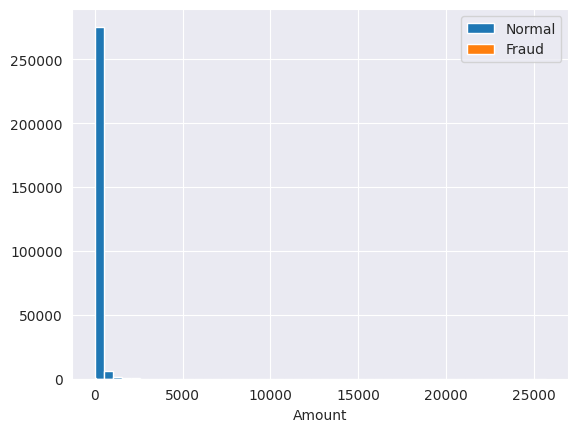

In [70]:
# create a histrogram to find the loan repayment status based on verfication.
sns.set_style('darkgrid')

plt.hist(df['Amount'].loc[df['Class'] == 0], bins=50, label='Normal')
plt.hist(df['Amount'].loc[df['Class'] == 1], bins=50, label='Fraud')

plt.legend()
plt.xlabel('Amount')
plt.show()

We can see this data is highly imbalance. So we need to just do the evaluation for developing any model.

In [71]:
# Create a function for numeric columns
numeric_column = [column for column in df.columns if df[column].dtype != '0']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
<ipython-input-72-abe43629adff>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
<ipython-input-72-abe43629adff>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1

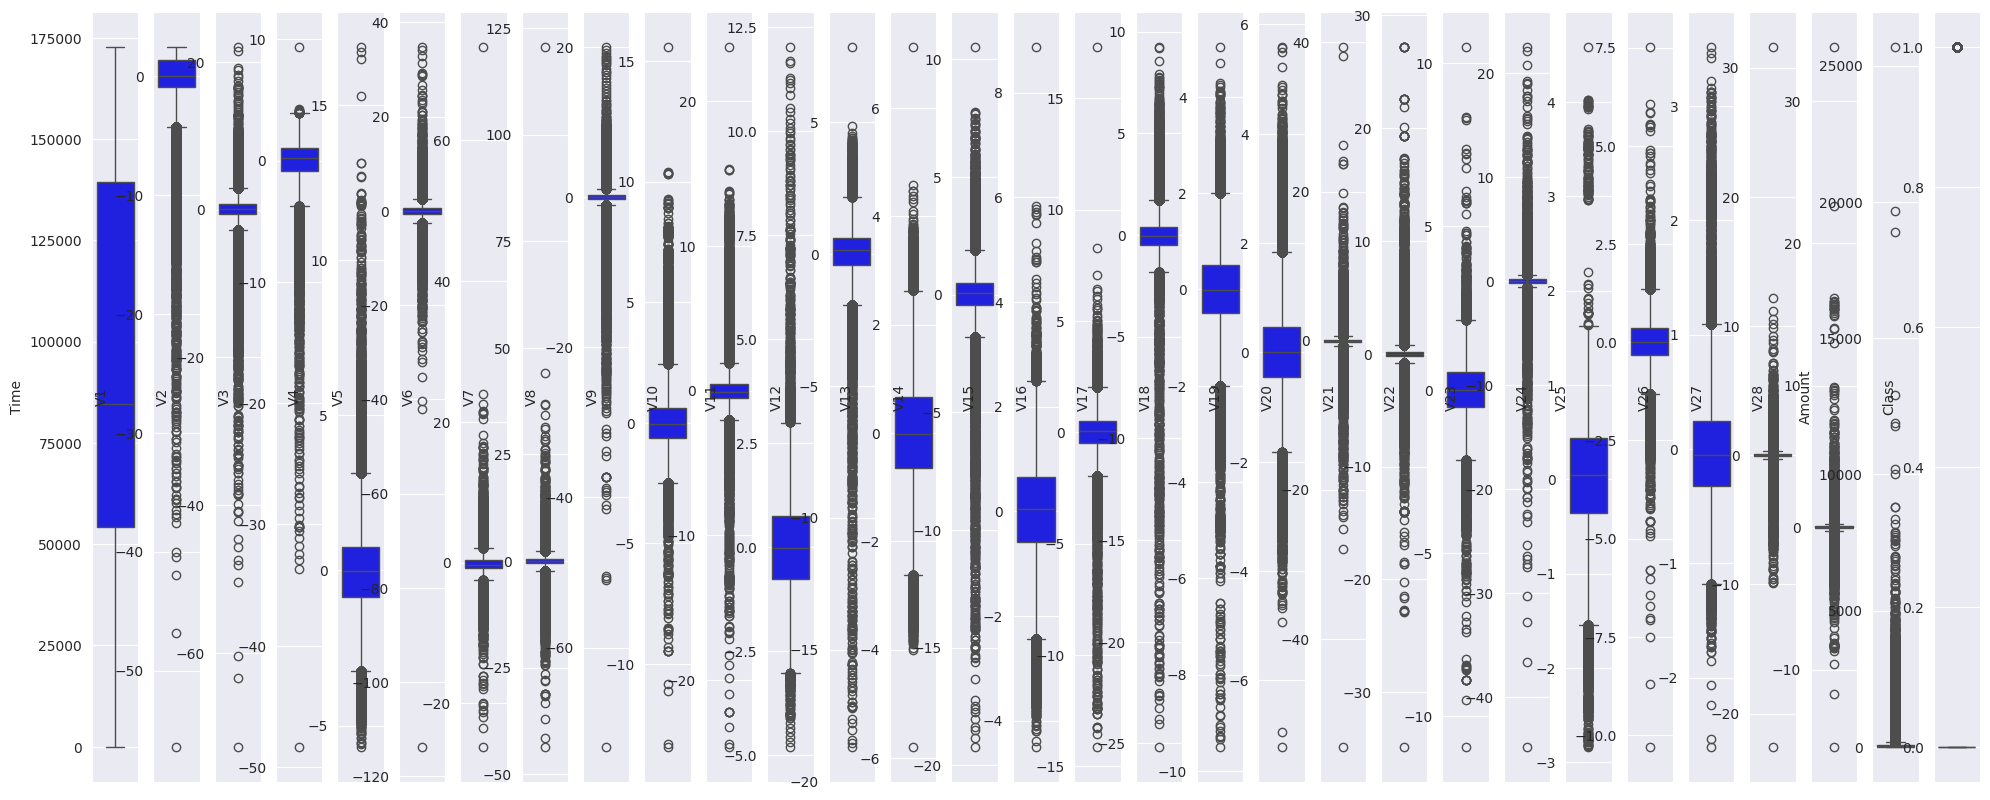

In [72]:
# Boxplot to check the outliers

plt.figure(figsize = (20,8))

for i in range(0, len(numeric_column)):
  plt.subplot(1, len(numeric_column), i+1)
  sns.boxplot(y = df[numeric_column[i]], color = 'blue', orient = 'h')
  plt.tight_layout()

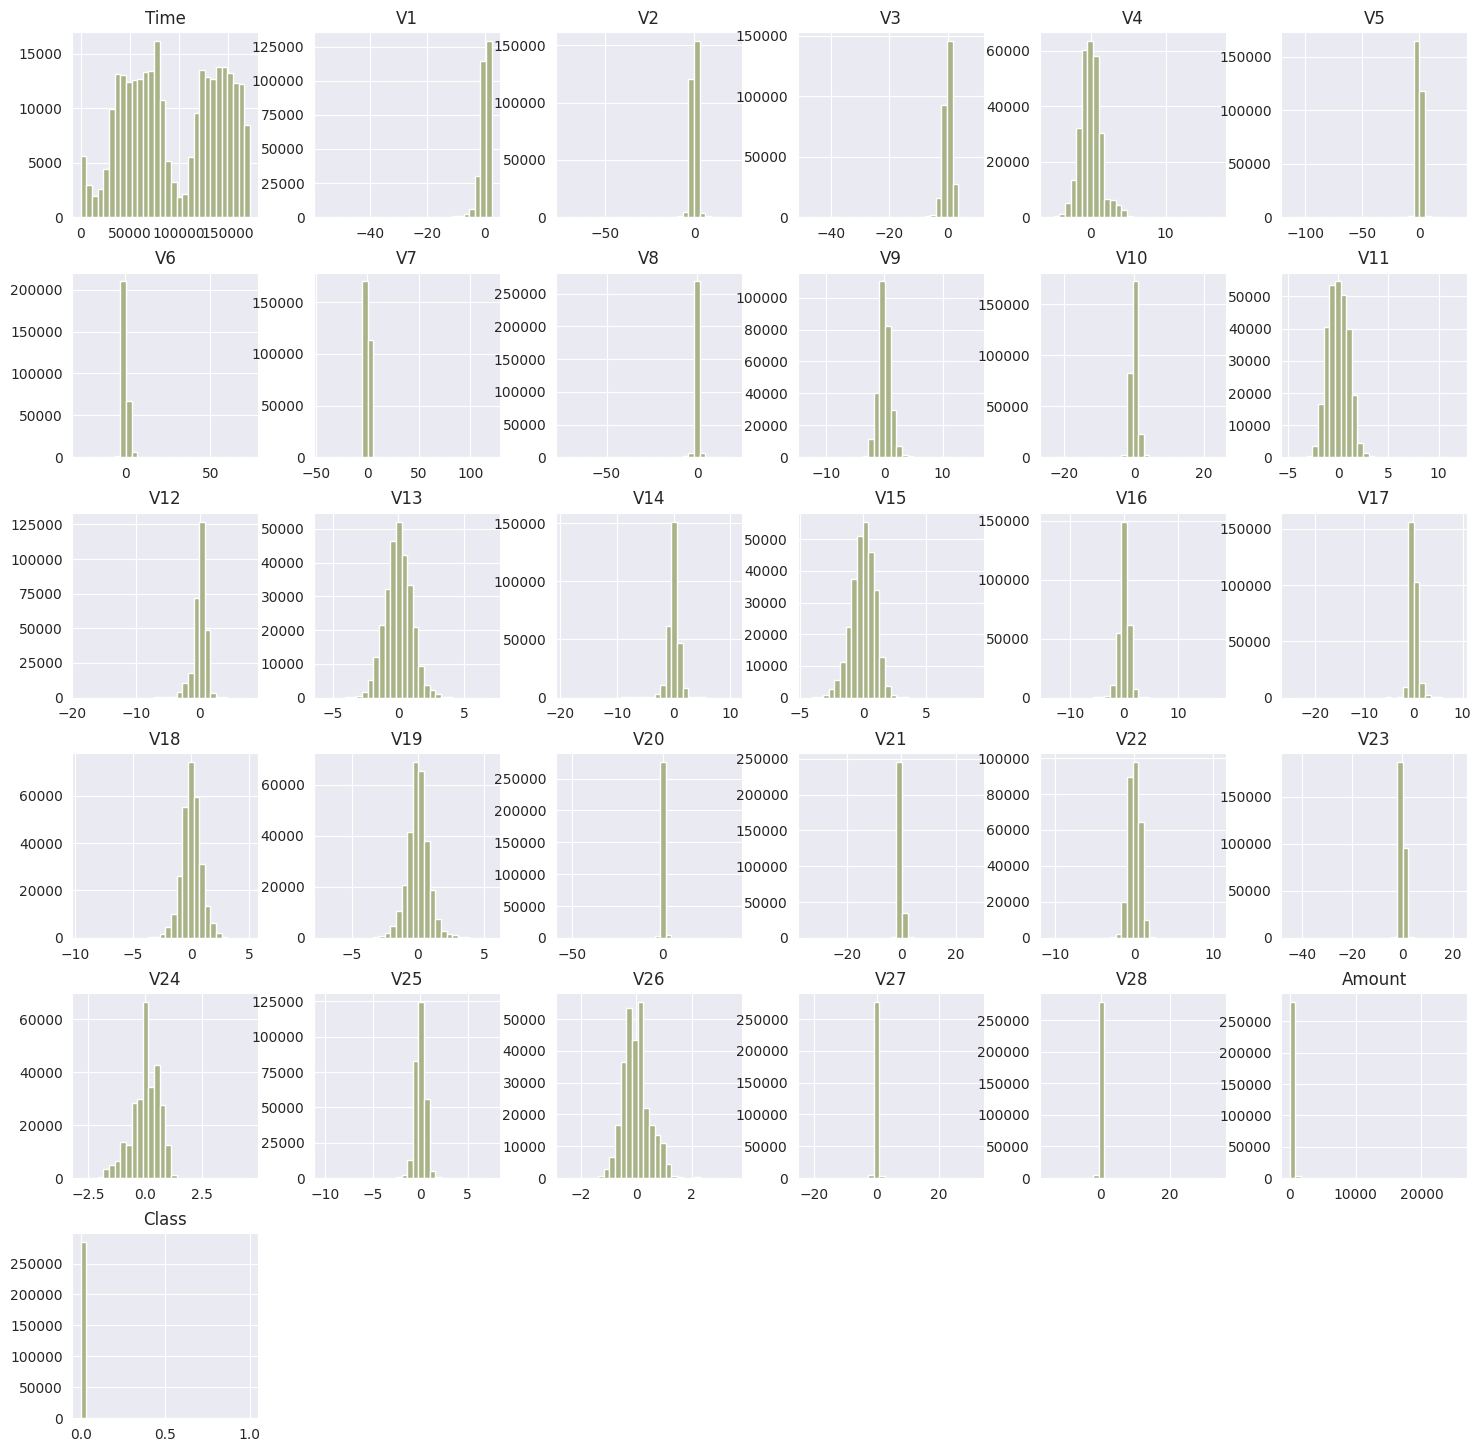

In [73]:
# Create a histogram
df.hist(bins = 30, figsize = (18,18),  color = '#A9B388' )
plt.show()

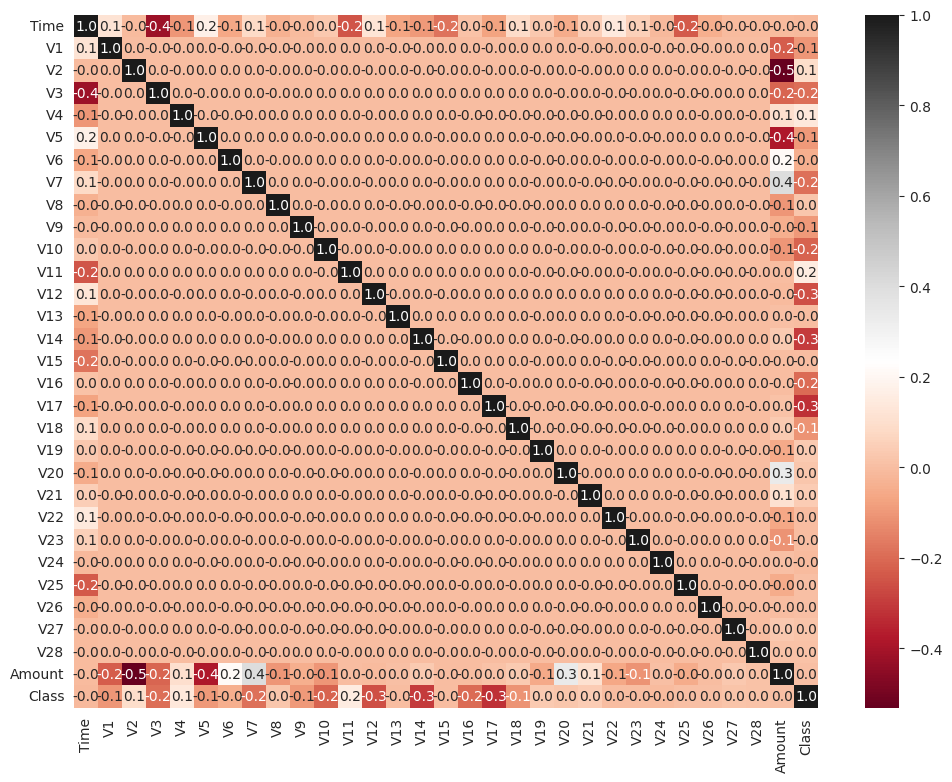

In [74]:
# Create a histrogram
df_corr = df.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(  df_corr,  cmap = 'RdGy' , annot=True , fmt=".1f")
plt.show()

# Handling the imbalance Dataset

In [75]:
# split the data using the target feature
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [76]:
# Taking random sample of data to balance the dataset.
normal_sample = normal.sample(n = 492)

In [77]:
# Join the both data set for analysis.
balance_df = pd.concat([normal_sample , fraud], axis = 0)

In [78]:
# view the balance dataset.
balance_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
161435,114177.0,-0.175770,0.703686,0.284417,-0.664613,0.320392,-0.918347,0.774791,-0.014618,-0.008095,...,-0.206227,-0.561598,0.145192,0.027325,-0.581428,0.109442,0.103317,0.079271,0.89,0
127960,78538.0,1.544307,-0.352764,-0.788061,-0.979262,0.011865,-0.615147,-0.078863,-0.302426,-1.003196,...,0.095182,0.197695,-0.334445,-0.983788,0.967064,0.003047,-0.033204,-0.012817,15.00,0
223923,143576.0,-0.669364,1.591086,-1.097919,-0.823425,0.809713,-0.305371,0.492665,0.513121,-0.126326,...,-0.324697,-0.787108,0.131365,0.118279,-0.274574,0.133647,0.314293,0.125414,2.58,0
284141,172191.0,0.224916,1.151355,-0.897729,-0.540632,1.260185,-1.012054,1.227693,-0.263206,-0.267578,...,-0.145012,-0.169939,0.076201,0.606749,-0.756645,0.178231,0.338553,0.210440,2.10,0
92476,63947.0,-0.307187,0.862875,1.158772,-0.555039,1.023881,0.713803,0.720209,0.063203,-0.483197,...,-0.285459,-0.556590,-0.220293,-1.349046,-0.127962,0.137947,0.115896,-0.128577,1.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [79]:
# check the balance dataset count.
balance_df.shape

(984, 31)

In [80]:
# Check the null or missing value in balance data
balance_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Split the data and develop the model

In [81]:
# import the train and test split
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
# Check the sklearn verison we are using in our project.
print(sklearn.__version__)

1.2.2


In [83]:
# split the balance data in X and Y
X = balance_df.drop(['Class'], axis = 1)
y = balance_df['Class']

In [84]:
# Assuming 'X' contains features and 'y' contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Example code for model training and evaluation

# import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=30, max_depth= 3, oob_score = True)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30, oob_score=True)

In [86]:
rf.oob_score_

0.9302325581395349

In [87]:
# Predict on the test set using random forest
y_pred_rf = rf.predict(X_test)

In [88]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

# Show the results by using random forest classifier model
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9391891891891891
Confusion Matrix:
[[150   0]
 [ 18 128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       150
           1       1.00      0.88      0.93       146

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



<Axes: xlabel='Class', ylabel='Count'>

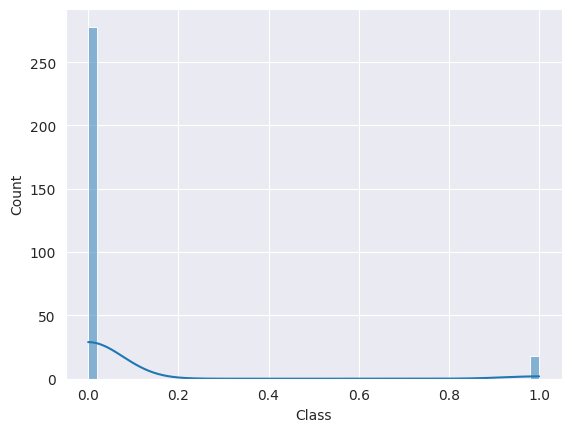

In [89]:
# Create a histrogram for Random Forest Classifier result
sns.histplot((y_test- y_pred_rf), kde=True, bins = 50)

In [90]:
# import the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

model_classifier = DecisionTreeClassifier(criterion="entropy", random_state=100)

# create a classifier object
model_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [91]:
# Predict on the test set using Decision Tree Classifier model
y_pred_cf= model_classifier.predict(X_test)

In [92]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_cf)
conf_matrix = confusion_matrix(y_test, y_pred_cf)
classification_rep = classification_report(y_test, y_pred_cf)

# Show the results by using Decision Tree classifier model
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9155405405405406
Confusion Matrix:
[[137  13]
 [ 12 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       150
           1       0.91      0.92      0.91       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



<Axes: xlabel='Class', ylabel='Count'>

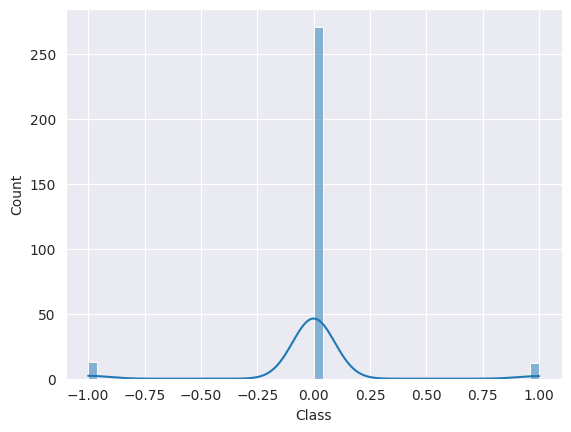

In [93]:
# Create a histrogram for Decision Tree Classifier result
sns.histplot((y_test- y_pred_cf), kde=True, bins = 50)

In [94]:
# import the Logistic Regression
from sklearn.linear_model import LogisticRegression

# Choose a model architecture.
model_lr = LogisticRegression()

# Train the model on the training set.
model_lr.fit(X_train, y_train)

# Evaluate the model on the testing set.
y_pred_lr = model_lr.predict(X_test)

# Evaluate the accuracy score, confusion matrix and classification report
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

In [95]:
# Show the results by using Logistic Regression model
print(accuracy_lr)
print(confusion_matrix_lr)
print(classification_report_lr)

0.918918918918919
[[142   8]
 [ 16 130]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       150
           1       0.94      0.89      0.92       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



<Axes: xlabel='Class', ylabel='Count'>

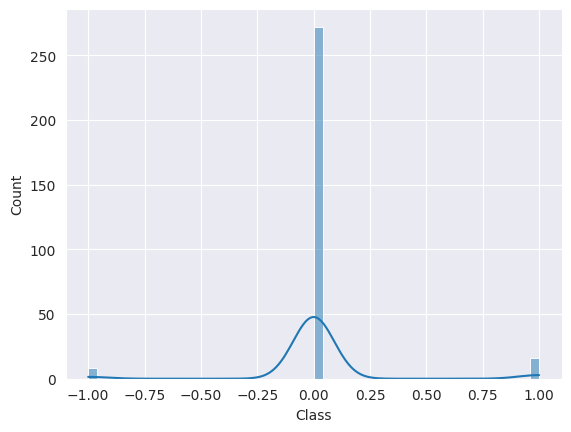

In [96]:
# Create a histrogram for Logistic Regression result
sns.histplot((y_test- y_pred_lr), kde=True, bins = 50)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Create K Neighbors Classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

In [98]:
# Show the results by using KNN model
print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix: {confusion_matrix_knn}")
print(f"Classification Report: {classification_report_knn}")

Accuracy: 0.6891891891891891
Confusion Matrix: [[108  42]
 [ 50  96]]
Classification Report:               precision    recall  f1-score   support

           0       0.68      0.72      0.70       150
           1       0.70      0.66      0.68       146

    accuracy                           0.69       296
   macro avg       0.69      0.69      0.69       296
weighted avg       0.69      0.69      0.69       296



<Axes: xlabel='Class', ylabel='Count'>

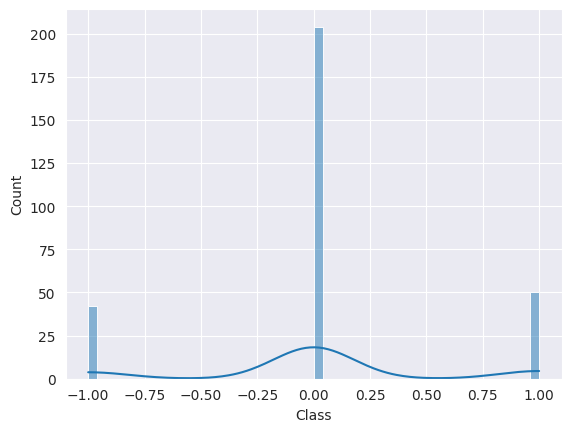

In [99]:
# Create a histrogram for KNeighbors Classifier result
sns.histplot((y_test- y_pred_knn), kde=True, bins = 50)

In [100]:
# import the XGBoost classifier
from xgboost import XGBClassifier

# Create xgb model Classifier
xgb_model = XGBClassifier(tree_method="hist", device="cuda")

# Fit the model to test the data
xgb_model.fit(X_train,y_train.values.ravel())

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
classification_xgb = classification_report(y_test, y_pred_xgb)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:36:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


In [101]:
# Shpw the result by using XGBoost model
print(f"Accurance Score : {accuracy_xgb}")
print(f"Confursion Matrix :{cm_xgb}")
print(f"Classification Report :{classification_xgb}")

Accurance Score : 0.9527027027027027
Confursion Matrix :[[149   1]
 [ 13 133]]
Classification Report :              precision    recall  f1-score   support

           0       0.92      0.99      0.96       150
           1       0.99      0.91      0.95       146

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296



<Axes: xlabel='Class', ylabel='Count'>

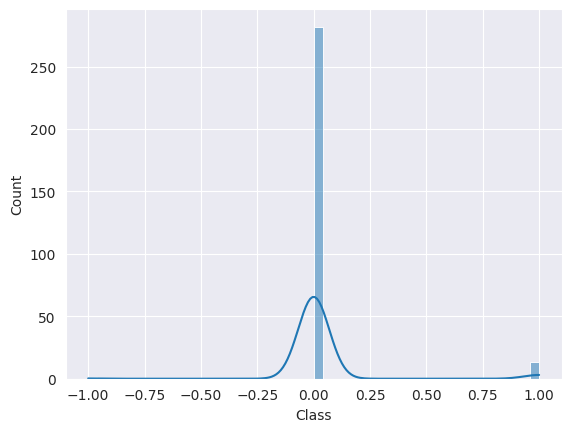

In [102]:
# Create a histrogram for XGB boost result
sns.histplot((y_test- y_pred_xgb), kde=True, bins = 50)

Text(50.722222222222214, 0.5, 'acutals')

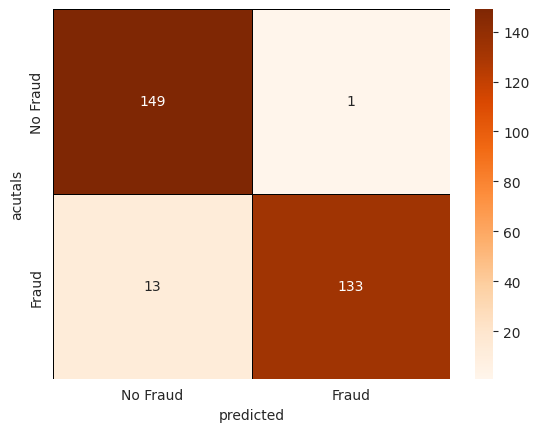

In [103]:
# show confusion matric with heatmap
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap = 'Oranges', linewidths=0.5, linecolor= 'Black')
plt.xticks(np.arange(2)+.5, ['No Fraud', 'Fraud'])
plt.yticks(np.arange(2)+.5, ['No Fraud', 'Fraud'])
plt.xlabel("predicted")
plt.ylabel("acutals")

We have applied mulitple model on the given dataset and two of them giving us best result so far. One is Logistic Regression and XG Boost Classifier.

So we are saving XG Boost Classifier for future use.